In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
red_wine['wine_type'] = 'red'
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
white_wine['wine_type'] = 'white'
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

wines = pd.concat([red_wine, white_wine])

wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)




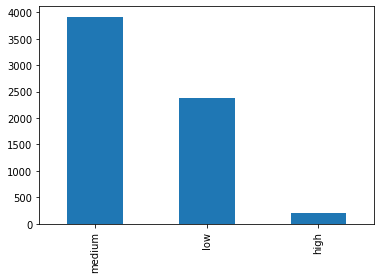

In [5]:
wines.quality_label.value_counts().plot(kind = 'bar');

In [ ]:
wines.quality_label.value_counts()

medium    3915
low       2384
high       198
Name: quality_label, dtype: int64

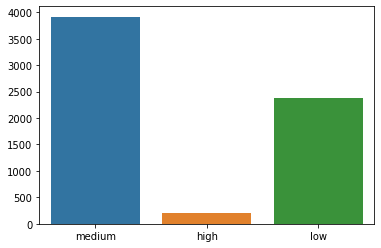

In [ ]:
sns.barplot(x = wines.quality_label.value_counts().index, y = wines.quality_label.value_counts().values,
            order = ['medium', 'high','low']);

## **Exploratory Data Analysis**

* Uncover the underlying structure of data to get the insights. 

* EDA helps to identify important variables and detect outliers and anomalies. 


### **Histograms**

This is always with an array or list of values (continuos)

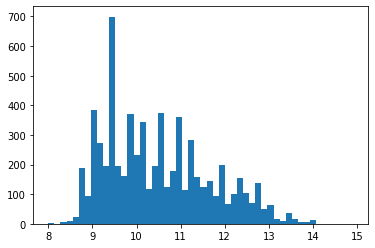

In [ ]:
import matplotlib.pyplot as plt
plt.hist(wines.alcohol, bins = 50);

In [ ]:
plt.rcParams['figure.facecolor'] = 'grey'


In case, you want to divide it based on red / white wine

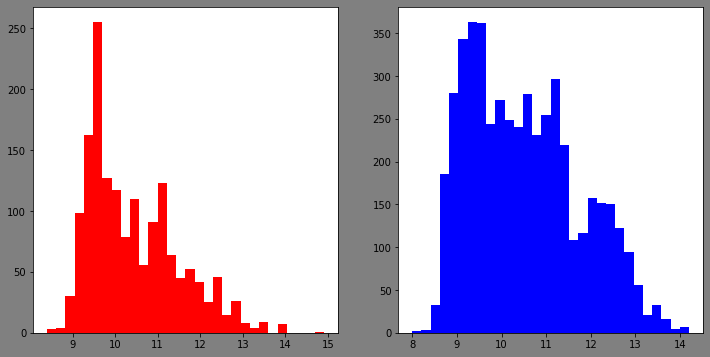

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax[0].hist( wines[wines['wine_type'] == 'red']['alcohol'], 30, color = 'red');
ax[1].hist( wines[wines['wine_type'] == 'white']['alcohol'], 30, color = 'blue');

**Putting original color**

red and white

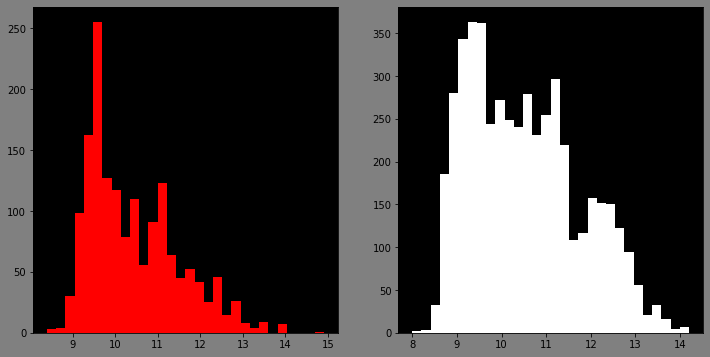

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax[0].set_facecolor('xkcd:black') # change the bg color
ax[0].hist( wines[wines['wine_type'] == 'red']['alcohol'], 30, color = 'red');
ax[1].set_facecolor('xkcd:black')
ax[1].hist( wines[wines['wine_type'] == 'white']['alcohol'], 30, color = 'white');

### **Scatterplot**

It has both x and y axis. This is used to explain the relation between two variables.(continuous).

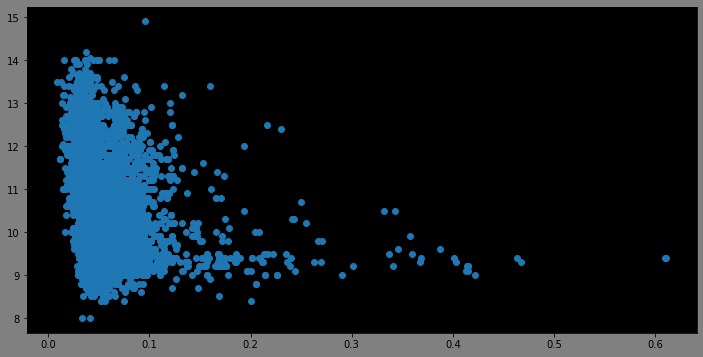

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.set_facecolor('xkcd:black') 

ax.scatter(wines['chlorides'], wines['alcohol']);

How it varies based on wine type

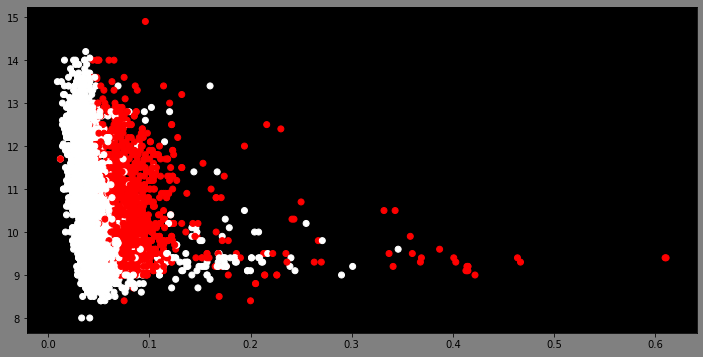

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.set_facecolor('xkcd:black') 

ax.scatter(wines['chlorides'], wines['alcohol'], color = wines['wine_type']);

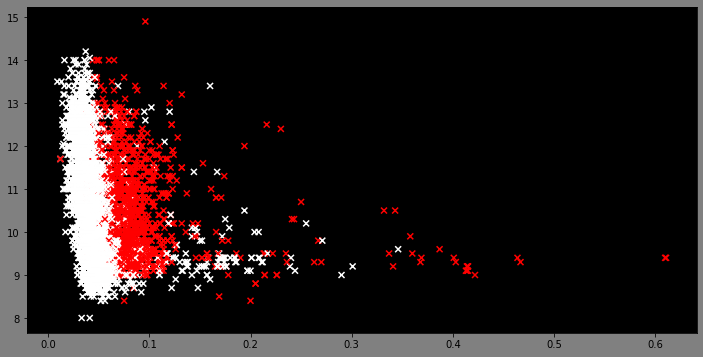

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.set_facecolor('xkcd:black') 

ax.scatter(wines['chlorides'], wines['alcohol'], color = wines['wine_type'], marker = 'x');

**Added some transparency**

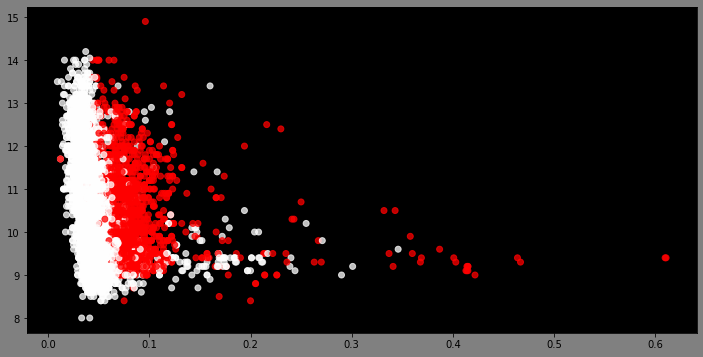

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.set_facecolor('xkcd:black') 

ax.scatter(wines['chlorides'], wines['alcohol'], color = wines['wine_type'], alpha = 0.75);

**based on quality**

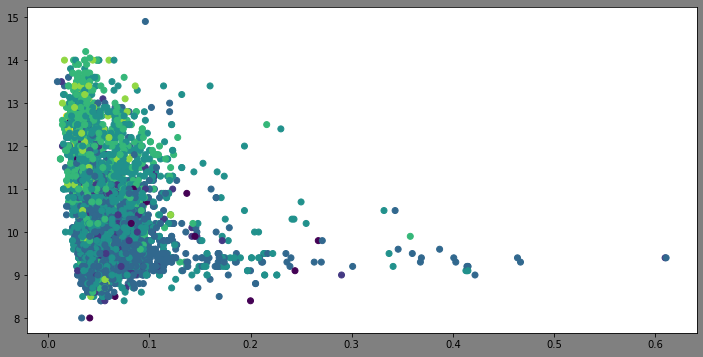

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.set_facecolor('xkcd:white') 

ax.scatter(wines['chlorides'], wines['alcohol'], c = wines['quality']);

## **boxplot**

It also takes one array (similar to histogram) and labels

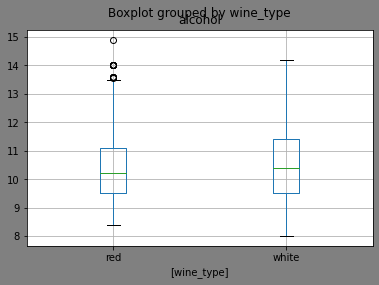

In [ ]:
wines[['alcohol', 'wine_type', 'quality_label']].boxplot(by='wine_type');

**make it nicer**

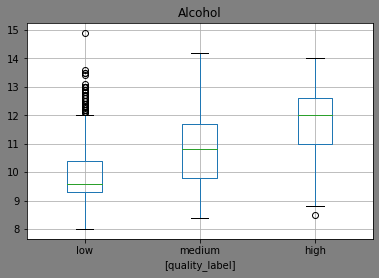

In [ ]:
wines[['alcohol', 'wine_type', 'quality_label']].boxplot(by=['quality_label']);
plt.title( 'Alcohol' );
plt.suptitle('')
plt.show();

**explore more options to make it nice**

## **Label Encoder for Wine Quality**

In [ ]:
wines.columns[]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type', 'quality_label'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
wines.iloc[:, -1] = labelencoder.fit_transform(wines.iloc[:, -1])

In [ ]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,0
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,1
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,2
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,2
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5,white,1
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,white,2
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,white,1
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5,white,1


## **Feature engineering**

In [ ]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5,white,low
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,white,medium
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,white,low
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5,white,low


In [ ]:
wines = wines.drop(columns=['quality', 'wine_type'])

In [ ]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,high
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,low
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,medium
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,medium
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,low
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,medium
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,low
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,low


In [ ]:
wines.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality_label           category
dtype: object

In [ ]:
#wines.quality = wines.quality.astype('category')

In [ ]:
wines.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality_label           category
dtype: object

In [ ]:
X = wines.drop(columns=['quality_label'])
y = wines['quality_label']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()
X = np.array(X)
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X

array([[-0.16608919, -1.0306286 ,  2.89984453, ...,  0.25811972,
        -1.016626  ,  1.43230805],
       [ 0.37389511,  1.82436558, -0.74761336, ...,  0.32031851,
        -0.54617826, -0.49621913],
       [-0.32037042,  0.30575165,  0.14704613, ..., -0.23947061,
        -0.61338508,  1.26461004],
       ...,
       [-0.62893288,  0.18426254, -0.81643332, ...,  0.13372214,
        -0.6805919 , -0.83161516],
       [-0.55179227, -0.48392759,  1.24816549, ..., -0.23947061,
        -0.41176462, -0.83161516],
       [-0.01180796,  1.70287646, -1.77991276, ...,  1.81308951,
         0.05868313, -0.83161516]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
neigh.score(X_test, y_test)

0.7165501165501166

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
#y_pred = rf.predict(X_test)


0.7995337995337995

In [ ]:
from sklearn.metrics import cohen_kappa_score as kappa

In [ ]:
kappa(y_pred, y_test)

0.5887290599598527